***Machine Learning : Project 1***  


In [1]:
# Packages import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


# Linear regression : Numpy를 이용하여 구현하기

##  Linear regression을 위한 Parameter의 Gradient 식 정리

$$ \frac{\partial \bf J}{\partial \bf w} = \sum_{i=1}^N{2 \bf x_i(\bf w^\top \bf x_i + b - t_i)} $$

$$ \frac{\partial \bf J}{\partial b} = \sum_{i=1}^N 2(\bf w^\top x_i + b - t_i)$$

Design matrix version

$$ \frac{\partial \bf J}{\partial \bf w} = 2 (\bf X^\top \bf X \bf w - \bf X^\top \bf t)  $$


## Linear regression 학습을 위한 Stochastic Gradient Descent (SGD) Method

### SGD를 이용한 parameter update 식 정리

batch_num = ceil(N / M)  
lr = $\eta$  
for i in range(epoch){  
    $\quad$ for j in range(batch_num){  
        $\qquad D_m = sample(X, m)$  
        $\qquad w_{grad} = \sum_{i=1}^N{2 \bf x_i(\bf w^\top \bf x_i + b - t_i)} $  
        $\qquad b_{grad} = \sum_{i=1}^N 2(\bf w^\top x_i + b - t_i )$  
        $\qquad w = w - lr * w_{grad}$  
        $\qquad b = b - lr * b_{grad}$  
    $\quad$}  
}

### L2 regularization 추가

batch_num = ceil(N / M)  
lr = $\eta$  
for i in range(epoch){  
    $\quad$ for j in range(batch_num){  
        $\qquad D_m = sample(X, m)$  
        $\qquad w_{grad} = \sum_{i=1}^N{2 \bf x_i(\bf w^\top \bf x_i + b - t_i)} $  
        $\qquad b_{grad} = \sum_{i=1}^N 2(\bf w^\top x_i + b - t_i )$  
        $\qquad w = w - lr * (w_{grad} + \lambda w)$  
        $\qquad b = b - lr * b_{grad}$  
    $\quad$}  
}

### Early stopping 추가

Early Stopping은 모델이 학습 데이터에 과적합되는 것을 방지하는 역할을 한다. 매 epoch마다 validation 데이터를 이용하여 best_loss와 현재 valid_loss를 비교한다. 만약 현재 loss가 더 작다면 best_loss를 업데이트하고 현재 모델의 스냅샷을 찍어놓는다. 만약 best_epoch에서 n_early 에포크만큼 증가하였을 때까지 loss가 줄지 않으면 모델이 과적합 되는 중이므로, 학습을 중단하고 스냅샷을 찍어놓은 모델을 최종 모델로 선택한다.

## [Main Project] Linear regression을 위한 SGD 구현

### 랜덤 데이터 생성기 구현 : Gaussian 분포에 기반

In [5]:
# Generate random datasets
file_name = "myrandomdataset.pkl"
!python3 LinearRegression/gen_random_dataset.py --n_total 10000 --feature_dim 10 --file_name $file_name

랜덤 데이터 생성이 완료되었습니다.
X = (10000, 10), t = (10000,), w = (10,), b = (1,)


### scikit 샘플 예제 : diabets

### Linear regression 학습기 테스트

#### 코드 설명

0. gen_random_dataset.py
    - gen_random_dataset : 랜덤 데이터셋을 생성하고, pickle을 이용하여 파일로 저장한다.

1. datatools.py
    - get_dataset_with_parameters, get_diabetes_data : 생성된 데이터셋을 읽어온다 (random_dataset, diabetes_dataset).
    - DataLoader (class) : 미니배치 방식으로 학습시키기 위하여 만든 클래스이다. train data를 넣으면 배치사이즈 크기로 데이터를 나누며, 해당 데이터셋을 멤버 변수로 저장한다. 그리고 iterator로 작동하기 위하여, __iter__와 __next__를 작성한다. __next__는 나눠진 미니배치가 모두 사용될때까지 인덱스를 1씩 키우며, 만약 모든 미니배치를 다 읽어왔다면, 해당 미니배치를 shuffle하고, index를 0으로 초기화한다.

2. linear_regression.py
    - linear_regression(Class) : 선형회귀 모델 클래스이다. 피쳐의 차원을 받아 weight와 bias를 초기화하고, forward를 호출시 선형회귀직선에 X를 대입하여 반환한다.
    
3. trainer.py
    - linear_regression_trainer(Class) : 모델을 학습 시키는 wrapper 클래스이다. 모델 인스턴스와 데이터셋, 하이퍼파라미터를 입력으로 받고 멤버변수로 저장한다.
        - train : 모델을 n_epoch만큼 학습한다. n_epoch 만큼 이터레이션을 돌며 한 에포크에 모든 미니배치 데이터셋을 이용하여 학습한다. early_stopping을 사용시, 이전 best_loss와 현재 loss를 비교하여 더 낮다면 업데이트하고, early_count를 0으로 초기화한다. 그리고 해당 파라미터를 deepcopy하여 저장한다. 만약 n_iter_no_change 만큼 변화가 없었다면 학습을 종료한다. weight_decay (L2 regularization)도 적용하고, 기울기 공식을 이용하여 파라미터를 업데이트한다. 매 에포크마다 train / valid / test loss를 출력한다.
        - get_mse_loss : 모델의 output과 실제 t를 이용하여 Mean Square Error를 구한다.
        - evaluate : validation, test 데이터를 이용하여 mse_loss를 구한다.
        
4. main.py
    - main : fire 패키지를 이용하여 CLI로 학습을 진행하였다. fire를 통해 터미널로 인자를 입력받고 해당 하이퍼파라미터를 이용하여 모델과 트레이너를 생성한다. 그리고 입력받은 에포크만큼 모델을 학습시킨다.

#### 실행 결과

In [15]:
# random dataset

!python3 LinearRegression/main.py --data_name random_dataset --feature_dim 10 --n_epoch 1000 --early_stopping True --learning_rate 1e-2

epoch : 1   train_loss : 120.530   valid_loss : 1.318   test_loss : 1.368
            w_SE : 0.001   b_SE : 0.356
epoch : 2   train_loss : 1.147   valid_loss : 0.983   test_loss : 1.023
            w_SE : 0.001   b_SE : 0.026
epoch : 3   train_loss : 1.029   valid_loss : 1.020   test_loss : 1.035
            w_SE : 0.001   b_SE : 0.002
epoch : 4   train_loss : 1.019   valid_loss : 1.003   test_loss : 1.031
            w_SE : 0.001   b_SE : 0.000
epoch : 5   train_loss : 1.020   valid_loss : 0.984   test_loss : 1.027
            w_SE : 0.001   b_SE : 0.000
epoch : 6   train_loss : 1.019   valid_loss : 0.978   test_loss : 1.001
            w_SE : 0.001   b_SE : 0.000
epoch : 7   train_loss : 1.024   valid_loss : 0.963   test_loss : 1.015
            w_SE : 0.001   b_SE : 0.000
epoch : 8   train_loss : 1.021   valid_loss : 0.961   test_loss : 1.000
            w_SE : 0.000   b_SE : 0.000
epoch : 9   train_loss : 1.017   valid_loss : 1.012   test_loss : 1.079
            w_SE : 0.001   b_S

In [14]:
# diabetes dataset

!python3 LinearRegression/main.py --data_name diabetes_dataset --feature_dim 10 --n_epoch 1000 --early_stopping True --learning_rate 0.1

epoch : 1   train_loss : 19123.190   valid_loss : 9685.052   test_loss : 11291.136
epoch : 2   train_loss : 8914.449   valid_loss : 6240.632   test_loss : 7569.018
epoch : 3   train_loss : 6565.679   valid_loss : 5579.407   test_loss : 6771.898
epoch : 4   train_loss : 6017.879   valid_loss : 5479.599   test_loss : 6607.044
epoch : 5   train_loss : 5874.181   valid_loss : 5465.913   test_loss : 6559.921
epoch : 6   train_loss : 5819.053   valid_loss : 5463.485   test_loss : 6534.032
epoch : 7   train_loss : 5783.060   valid_loss : 5462.147   test_loss : 6514.320
epoch : 8   train_loss : 5756.772   valid_loss : 5446.343   test_loss : 6489.297
epoch : 9   train_loss : 5732.361   valid_loss : 5432.377   test_loss : 6465.634
epoch : 10   train_loss : 5707.546   valid_loss : 5421.981   test_loss : 6444.430
epoch : 11   train_loss : 5685.774   valid_loss : 5401.788   test_loss : 6418.011
epoch : 12   train_loss : 5662.013   valid_loss : 5386.928   test_loss : 6394.911
epoch : 13   train_loss

# Logistic regression

## Logistic regression 학습을 위한 식 정리

### 기본 Gradient식 정리

$$ \frac{\partial \bf J}{\partial \bf W} = \sum_{(x,t)\in D_m}\bf(y - t)x^\top = X^\top(Y - T)$$

$$ \frac{\partial \bf J}{\partial b} = \sum_{x,t \in D_m}\bf(y-t) = (Y - T)^\top \bf 1_m$$

### L2 정규화를 반영한 파라미터 update식 정리

batch_num = ceil(N / M)  
lr = $\eta$  
for i in range(epoch){  
    $\quad$ for j in range(batch_num){  
        $\qquad D_m = sample(X, m)$  
        $\qquad w_{grad} = \sum_{(x,t)\in D_m}\bf(y - t)x^\top = X^\top(Y - T) $  
        $\qquad b_{grad} = \sum_{x,t \in D_m}\bf(y-t) = (Y - T)^\top \bf 1_m$  
        $\qquad w = w - lr * w_{grad} / m$  
        $\qquad b = b - lr * b_{grad} / m$  
    $\quad$}  
}

## Early stopping을 반영한 SGD Method

2번과 마찬가지로 미니배치로 나눈 train data를 이용하여 1 epoch만큼 학습하고, valid dataset을 이용하여 accuracy와 비교한다.   
만약 n_early 에포크 만큼 accuracy가 증가하지 않는다면, 모델 학습을 중단하고 스냅샷 찍어놓은 모델을 채택한다.

## Logistic regression 학습을 위한 Stochastic Gradient Method 구현

### 코드 설명

로지스틱 회귀는 앞의 선형 회귀에서 SoftMax가 추가되었다. 그리고 손실함수로 Cross_entropy를 사용한다.  


* 2번에서 변경된 부분만 작성하였습니다.

1. datatools.py
    - get_MNIST_data : sklearn에 내장되어있는 fetch_openml을 이용하여 mnist_784를 다운받는다. 그리고 해당 데이터셋을 train_test_split을 이용하여 나눈다.
2. logistic_regression.py
    - 기존 linear_regression은 output 차원이 1이였는데, 이것을 k 차원으로 확장하였다. 그리고 softmax 함수를 구현하여 XW+b를 확률로 표현하였다.
3. trainer.py
    - 선형회귀는 MSE Loss를 사용하였으나, 로지스틱 회귀는 Cross Entropy Loss를 사용하였다. 그리고 early_stopping의 지표로 accuracy를 사용하였다.



In [25]:
# 로지스틱 회귀를 이용하여 MNIST를 classify한 결과

!python3 LogisticRegression/main.py --n_epoch 1000 --early_stopping True --batch_size 64 --n_iter_no_change 10

epoch : 1   train_loss : 3.190   valid_loss : 1.598   test_loss : 1.662
              train_acc : 0.581   valid_acc : 0.594   test_acc : 0.577
epoch : 2   train_loss : 1.287   valid_loss : 0.989   test_loss : 1.035
              train_acc : 0.734   valid_acc : 0.719   test_acc : 0.709
epoch : 3   train_loss : 0.910   valid_loss : 0.768   test_loss : 0.803
              train_acc : 0.719   valid_acc : 0.772   test_acc : 0.765
epoch : 4   train_loss : 0.741   valid_loss : 0.651   test_loss : 0.678
              train_acc : 0.781   valid_acc : 0.803   test_acc : 0.794
epoch : 5   train_loss : 0.643   valid_loss : 0.577   test_loss : 0.600
              train_acc : 0.844   valid_acc : 0.825   test_acc : 0.817
epoch : 6   train_loss : 0.578   valid_loss : 0.528   test_loss : 0.547
              train_acc : 0.828   valid_acc : 0.841   test_acc : 0.833
epoch : 7   train_loss : 0.533   valid_loss : 0.493   test_loss : 0.509
              train_acc : 0.828   valid_acc : 0.856   test_acc : 0.846

# Multi-layer perceptron(MLP)

## backpropagation 유도를 위한 기본 규칙

### Layer l의 post-activation delta vector로부터 pre-activation delta vector를 구하는 backprop 과정

$$ \delta_z = \delta_h * f'(z) $$

### Layer l의 delta vector로부터 layer l-1 delta vector 구하는 backprop 과정

$$ \delta_x = W^\top \delta_z   $$

### layer l의 delta vector가 주어질때 Parameter matrix update

$$ \Delta W = \delta_z x^\top $$
$$ \Delta b = \delta_z $$

## L개의 layer로 구성된 MLP의 backpropagation 알고리즘

backpropagation을 진행하는 방법은 다음과 같다.  
각각의 함수를 클래스로 만든다. (Relu, FC, Softmax)    
그리고 forward를 할 때, 입력 값을 멤버변수로 저장한다. (Backward시 gradient 계산하는데 필요함)    
현재까지 전달해온 upstream gradient를 입력으로 받아, 각각의 함수에 맞는 미분 공식을 이용하여 downstream gradient를 계산한다.  


함수의 backward 공식  
- Relu : $$\delta_z = \delta_h * mask$$ (입력이 0보다 크면 mask = 1, 0보다 작으면 mask = 0)  
- FC : 
$$\delta_X = \delta_z W^\top  $$
$$\delta_W = X^\top \delta_z $$
$$\delta_b = \sum \delta_z $$
- Softmax :
$$ \delta_Z = \delta_L * (p_t - t) $$



## MLP학습을 위한 Stochastic Gradient Descent Method 구현

### 코드 설명

앞서 기술헀던 gradient 공식을 이용하여 각각의 함수들을 클래스로 구현하였다.  
hidden layer만큼 FC와 ReLU 인스턴스를 생성하고,  리스트안에 묶어 저장한다.     
마찬가지로 output layer는 FC와 Softmax 인스턴스를 저장한다.    
forward시 hidden layer list를 순회하며 hidden representation을 출력한다. 그리고 output layer를 통해 클래스별 확률을 게산한다.  
backward시 forward의 역순으로 gradient를 계산하며 gradient list에 저장한다.
그리고 각 미니배치마다 파라미터를 업데이트한다.


In [21]:
!python3 MultiLayerPerceptron/main.py --n_epoch 100 --early_stopping True --nhidden 1 --hidden_dim "[100]"

epoch : 1   train_loss : 2.916   valid_loss : 0.571   test_loss : 0.581
              train_acc : 0.791   valid_acc : 0.878   test_acc : 0.862
epoch : 2   train_loss : 2.189   valid_loss : 0.419   test_loss : 0.434
              train_acc : 0.906   valid_acc : 0.900   test_acc : 0.888
epoch : 3   train_loss : 1.922   valid_loss : 0.367   test_loss : 0.385
              train_acc : 0.875   valid_acc : 0.910   test_acc : 0.898
epoch : 4   train_loss : 1.720   valid_loss : 0.341   test_loss : 0.360
              train_acc : 0.922   valid_acc : 0.914   test_acc : 0.904
epoch : 5   train_loss : 1.556   valid_loss : 0.325   test_loss : 0.343
              train_acc : 0.891   valid_acc : 0.920   test_acc : 0.910
epoch : 6   train_loss : 1.422   valid_loss : 0.313   test_loss : 0.332
              train_acc : 0.875   valid_acc : 0.923   test_acc : 0.912
epoch : 7   train_loss : 1.311   valid_loss : 0.304   test_loss : 0.324
              train_acc : 0.891   valid_acc : 0.926   test_acc : 0.916

In [22]:
!python3 MultiLayerPerceptron/main.py --n_epoch 100 --early_stopping True --nhidden 2 --hidden_dim "[100, 50]"

epoch : 1   train_loss : 3.665   valid_loss : 0.544   test_loss : 0.544
              train_acc : 0.930   valid_acc : 0.873   test_acc : 0.871
epoch : 2   train_loss : 2.708   valid_loss : 0.365   test_loss : 0.368
              train_acc : 0.859   valid_acc : 0.903   test_acc : 0.905
epoch : 3   train_loss : 2.358   valid_loss : 0.315   test_loss : 0.319
              train_acc : 0.953   valid_acc : 0.915   test_acc : 0.918
epoch : 4   train_loss : 2.093   valid_loss : 0.291   test_loss : 0.296
              train_acc : 0.922   valid_acc : 0.922   test_acc : 0.923
epoch : 5   train_loss : 1.879   valid_loss : 0.276   test_loss : 0.281
              train_acc : 0.938   valid_acc : 0.929   test_acc : 0.928
epoch : 6   train_loss : 1.703   valid_loss : 0.266   test_loss : 0.271
              train_acc : 0.938   valid_acc : 0.932   test_acc : 0.931
epoch : 7   train_loss : 1.558   valid_loss : 0.258   test_loss : 0.263
              train_acc : 0.922   valid_acc : 0.936   test_acc : 0.933

In [23]:
!python3 MultiLayerPerceptron/main.py --n_epoch 100 --early_stopping True --nhidden 3 --hidden_dim "[100, 50, 30]"

epoch : 1   train_loss : 4.420   valid_loss : 0.809   test_loss : 0.792
              train_acc : 0.767   valid_acc : 0.762   test_acc : 0.775
epoch : 2   train_loss : 3.074   valid_loss : 0.396   test_loss : 0.381
              train_acc : 0.922   valid_acc : 0.891   test_acc : 0.904
epoch : 3   train_loss : 2.621   valid_loss : 0.313   test_loss : 0.304
              train_acc : 0.906   valid_acc : 0.914   test_acc : 0.918
epoch : 4   train_loss : 2.313   valid_loss : 0.278   test_loss : 0.271
              train_acc : 0.906   valid_acc : 0.926   test_acc : 0.927
epoch : 5   train_loss : 2.069   valid_loss : 0.258   test_loss : 0.251
              train_acc : 0.922   valid_acc : 0.929   test_acc : 0.933
epoch : 6   train_loss : 1.869   valid_loss : 0.244   test_loss : 0.239
              train_acc : 0.938   valid_acc : 0.933   test_acc : 0.937
epoch : 7   train_loss : 1.706   valid_loss : 0.234   test_loss : 0.229
              train_acc : 0.938   valid_acc : 0.936   test_acc : 0.941

In [24]:
!python3 MultiLayerPerceptron/main.py --n_epoch 100 --early_stopping True --nhidden 4 --hidden_dim "[100, 50, 30, 20]"

epoch : 1   train_loss : 4.679   valid_loss : 0.845   test_loss : 0.839
              train_acc : 0.744   valid_acc : 0.748   test_acc : 0.751
epoch : 2   train_loss : 3.349   valid_loss : 0.446   test_loss : 0.428
              train_acc : 0.906   valid_acc : 0.884   test_acc : 0.889
epoch : 3   train_loss : 2.855   valid_loss : 0.345   test_loss : 0.331
              train_acc : 0.906   valid_acc : 0.911   test_acc : 0.914
epoch : 4   train_loss : 2.512   valid_loss : 0.294   test_loss : 0.283
              train_acc : 0.922   valid_acc : 0.926   test_acc : 0.929
epoch : 5   train_loss : 2.242   valid_loss : 0.268   test_loss : 0.256
              train_acc : 0.953   valid_acc : 0.935   test_acc : 0.937
epoch : 6   train_loss : 2.022   valid_loss : 0.245   test_loss : 0.235
              train_acc : 0.969   valid_acc : 0.937   test_acc : 0.940
epoch : 7   train_loss : 1.843   valid_loss : 0.234   test_loss : 0.222
              train_acc : 0.953   valid_acc : 0.943   test_acc : 0.943

- L = [1, 2, 3, 4] 학습결과 => Accuracy = [0.928, 0.945, 0.957, 0.963]  


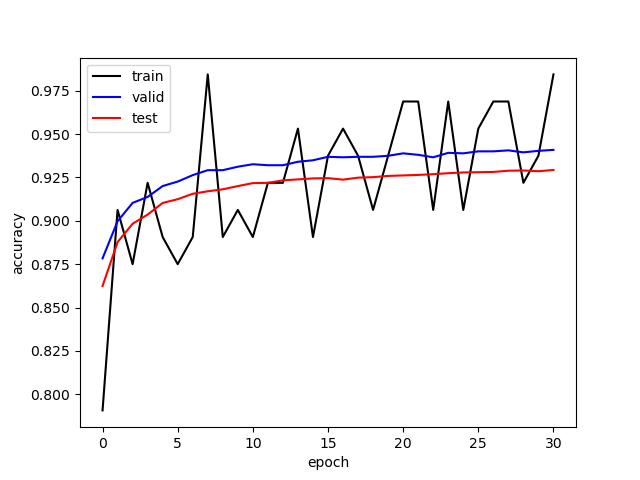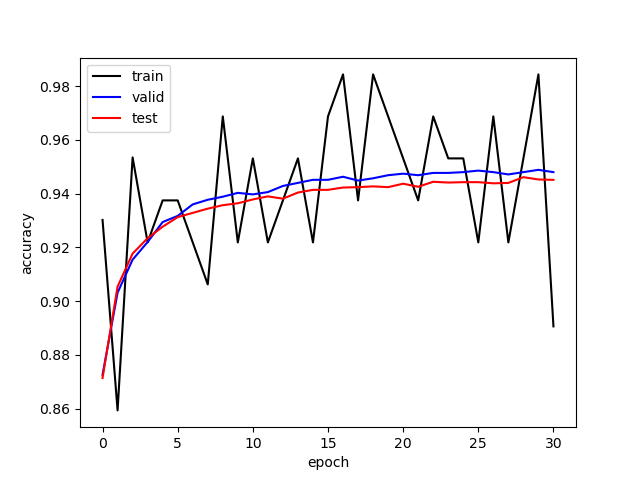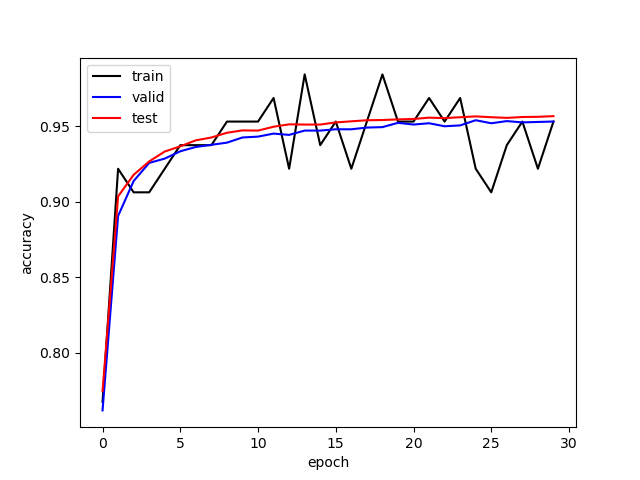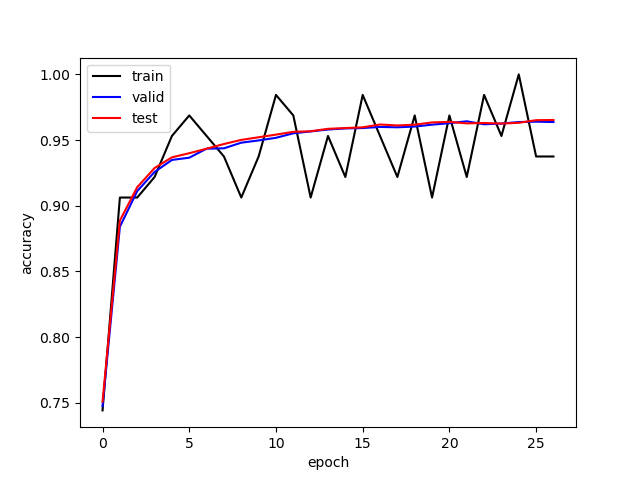

***감사합니다.***